In [1]:
#Imports
import numpy as np 
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [2]:
#Initialize Tweet List
fake_vac_tweets_list = []

In [3]:
#Pull tweets from Twitter API that contain "Fake vaccinations" in text of post
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Fake vaccinations').get_items()):
    if i > 999:
        break
    fake_vac_tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount])

In [4]:
#Create DataFrame
fake_vac_df = pd.DataFrame(fake_vac_tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Reply Count', 'Retweet Count'])

In [5]:
#Convert Text column to lowercase for searching purposes
fake_vac_df['Text'] = fake_vac_df['Text'].str.lower()

In [8]:
#Calculate number of tweets containg various words
fear_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('fear')==True].count()
hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('hoax')==True].count()
microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('microchip')==True].count()
conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('conspiracy')==True].count()
gates_num = fake_vac_df['Text'][(fake_vac_df['Text'].str.contains('bill gates')==True)].count()

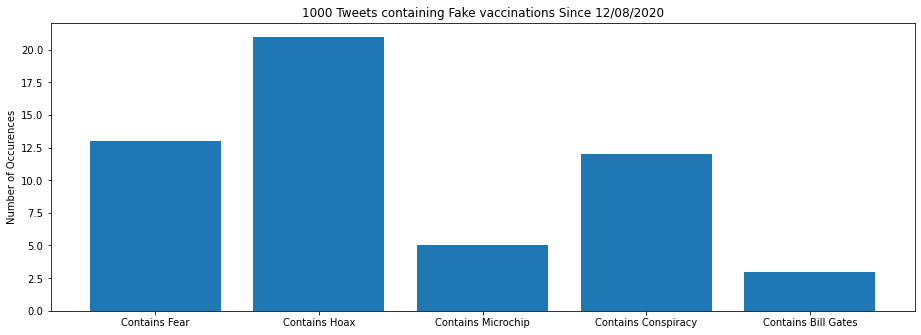

In [9]:
#Create bargraph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
ax.set_ylabel('Number of Occurences')
labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
ax.bar(labels,count_tweets)
plt.show()